In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [100]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    fig.set_size_inches(5, 5)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

In [2]:
#import data
towny=pd.read_csv('towny_df',index_col='town')
targets=pd.read_csv('target_df',index_col='town')
norm_towny=pd.read_csv('normalized_towns',index_col='town')
norm_buildings=pd.read_csv('norm_buildings_df',index_col='town')

In [5]:
norm_buildings.columns

Index(['com_elec_ghg', 'com_gas_1kdol', 'com_gas_ghg', 'com_gas_mcf',
       'ind_elec_ghg', 'ind_gas_1kdol', 'ind_gas_ghg', 'ind_gas_mcf',
       'res_elec_ghg', 'res_gas_1kdol', 'res_gas_ghg', 'res_gas_mcf'],
      dtype='object')

count    1065.000000
mean       20.534359
std       177.517823
min         0.000000
25%         4.096934
50%         7.847670
75%        14.380868
max      5558.735308
Name: com_elec_ghg, dtype: float64


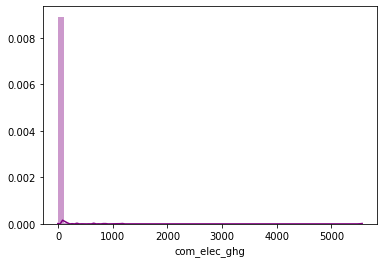

In [6]:
category='com_elec_ghg'
df=norm_buildings
print(df[category].describe())
sns.distplot(df[category].dropna(),color='purple')

In [20]:
norm_buildings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
com_elec_ghg,1065.0,20.534359,177.517823,0.000000e+00,4.096934,7.847670,14.380868,5558.735308
com_gas_1kdol,1065.0,0.000209,0.000976,0.000000e+00,0.000042,0.000098,0.000178,0.027790
com_gas_ghg,1065.0,3.389151,15.368675,0.000000e+00,0.658890,1.687280,3.044754,443.774943
com_gas_mcf,1065.0,0.028233,0.128033,0.000000e+00,0.005489,0.014056,0.025364,3.697039
ind_elec_ghg,1065.0,55.215386,238.929302,8.361711e-03,3.832191,10.545926,35.770120,6259.331435
ind_gas_1kdol,1065.0,0.001000,0.004107,1.439294e-07,0.000091,0.000251,0.000691,0.108200
ind_gas_ghg,1065.0,21.962581,75.915948,2.918518e-03,1.951478,5.535560,15.603120,1756.005695
ind_gas_mcf,1065.0,0.182957,0.632419,2.431234e-05,0.016257,0.046113,0.129980,14.628702
res_elec_ghg,1065.0,0.923293,2.404977,8.418849e-04,0.202807,0.418305,0.850325,41.147291
res_gas_1kdol,1065.0,0.000022,0.000045,0.000000e+00,0.000005,0.000012,0.000022,0.000858


In [16]:
norm_buildings.loc['New Castle, PA']

com_elec_ghg     5558.735308
com_gas_1kdol       0.027790
com_gas_ghg       443.774943
com_gas_mcf         3.697039
ind_elec_ghg     6259.331435
ind_gas_1kdol       0.108200
ind_gas_ghg      1756.005695
ind_gas_mcf        14.628702
res_elec_ghg       41.147291
res_gas_1kdol       0.000253
res_gas_ghg         2.665468
res_gas_mcf         0.022206
Name: New Castle, PA, dtype: float64

In [23]:
towny.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
biz,1065.0,1.301233e+03,3.977563e+03,0.0,361.0,595.0,1008.0,9.227600e+04
com_elec_ghg,1065.0,4.259406e+08,1.552328e+09,1404450.0,88421714.0,160709548.0,306476238.0,3.899552e+10
com_gas_1kdol,1065.0,5.413904e+03,2.173407e+04,0.0,835.0,2051.0,4339.0,5.648870e+05
com_gas_ghg,1065.0,8.912290e+07,4.079559e+08,0.0,13550917.0,34039342.0,68542185.0,1.170635e+10
com_gas_mcf,1065.0,7.424267e+05,3.398424e+06,0.0,112884.0,283560.0,570982.0,9.751826e+07
houses,1065.0,3.109776e+04,1.208871e+05,171.0,7623.0,12267.0,23646.0,3.128246e+06
ind,1065.0,3.722150e+02,1.327913e+03,2.0,81.0,148.0,283.0,2.637600e+04
ind_elec_ghg,1065.0,2.602867e+08,6.878156e+08,58164.0,22053933.0,71203431.0,214573544.0,1.332048e+10
ind_gas_1kdol,1065.0,6.141599e+03,1.982612e+04,1.0,500.0,1609.0,4549.0,3.835140e+05
ind_gas_ghg,1065.0,1.534340e+08,6.479179e+08,18661.0,10465847.0,35555848.0,104647047.0,1.737283e+10


In [21]:
towny.loc['New Castle, PA']

biz                     5.0
com_elec_ghg     12201424.0
com_gas_1kdol          61.0
com_gas_ghg        974086.0
com_gas_mcf          8115.0
houses                171.0
ind                     2.0
ind_elec_ghg      5495693.0
ind_gas_1kdol          95.0
ind_gas_ghg       1541773.0
ind_gas_mcf         12844.0
pop                   439.0
res_elec_ghg      3088886.0
res_gas_1kdol          19.0
res_gas_ghg        200094.0
res_gas_mcf          1667.0
age                    36.3
edu                    85.3
income              45795.0
poverty                 5.4
Name: New Castle, PA, dtype: float64

In [30]:
inc_target=pd.read_csv('binned_income',index_col='town')

In [31]:
inc_target['target'].value_counts()

4    242
3    242
2    242
1    242
5     86
6     11
Name: target, dtype: int64

In [42]:
norm_buildings.head()

,com_elec_ghg,com_gas_1kdol,com_gas_ghg,com_gas_mcf,ind_elec_ghg,ind_gas_1kdol,ind_gas_ghg,ind_gas_mcf,res_elec_ghg,res_gas_1kdol,res_gas_ghg,res_gas_mcf
town,,,,,,,,,,,,
"Bismarck, ND",5.278733,0.000063,1.389766,0.011577,13.112485,0.000133,6.110590,0.050903,0.132518,0.000006,0.092019,0.000767
"Ridgewood, NJ",12.184245,0.000168,2.786525,0.023213,2.083371,0.000059,1.083858,0.009029,0.733765,0.000036,0.574510,0.004786
"Natchez, MS",19.599945,0.000129,2.136768,0.017800,5.007261,0.000099,2.737231,0.022802,1.472474,0.000022,0.261363,0.002177
"Southaven, MS",17.832333,0.000073,1.205750,0.010044,12.858594,0.000241,6.653989,0.055430,0.473556,0.000007,0.086864,0.000724
"Garfield, NJ",7.066344,0.000140,2.315702,0.019291,5.032117,0.000144,2.617920,0.021808,0.405756,0.000017,0.273623,0.002279


In [90]:
X=norm_buildings
y=inc_target['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=.7)
smote = SMOTE(ratio='minority')
X_sm_train, y_sm_train = smote.fit_resample(X_train, y_train)
# X_sm_test, y_sm_test = smote.fit_resample(X_test, y_test)

In [96]:
dt_clf = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 5,
 min_samples_leaf= 6,
 min_samples_split= 8)

dt_cv_score = cross_val_score(dt_clf, X_sm_train, y_sm_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")
# {'criterion': 'entropy',
#  'max_depth': 5,
#  'min_samples_leaf': 1,
#  'min_samples_split': 10}

Mean Cross Validation Score: 39.02%


In [97]:
X_sm_train.shape

(907, 12)

In [93]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6,20],
    'min_samples_split': [2, 5, 10,20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6,20]
}

In [94]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_sm_train, y_sm_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=20,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=6,
                                              min_samples_split=8,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 20],
           

In [95]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Testing Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 53.34%
Mean Testing Score: 24.06%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [72]:
##Spot-Checking Algorithms
models = []
# models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
#testing models
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=42)
    cv_results = cross_val_score(model, X_sm_train, y_sm_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.178943 (0.065351)
KNN: 0.203584 (0.092247)
CART: 0.241761 (0.029796)
SVM: 0.241660 (0.107822)
XGB: 0.250938 (0.075494)
RF: 0.250944 (0.054319)


Confusion matrix, without normalization
[[31 15 18  8  0  4]
 [21 16 18  8  2  6]
 [20 21 13 15  0 11]
 [25  8  6 15  1 17]
 [ 5  3  1  5  1  4]
 [ 1  0  0  1  0  0]]
Normalized confusion matrix
[[0.41 0.2  0.24 0.11 0.   0.05]
 [0.3  0.23 0.25 0.11 0.03 0.08]
 [0.25 0.26 0.16 0.19 0.   0.14]
 [0.35 0.11 0.08 0.21 0.01 0.24]
 [0.26 0.16 0.05 0.26 0.05 0.21]
 [0.5  0.   0.   0.5  0.   0.  ]]


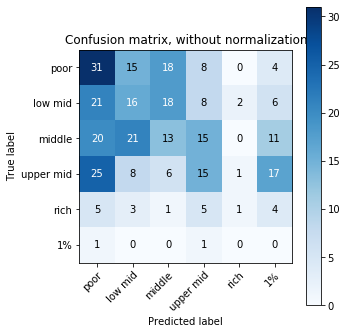

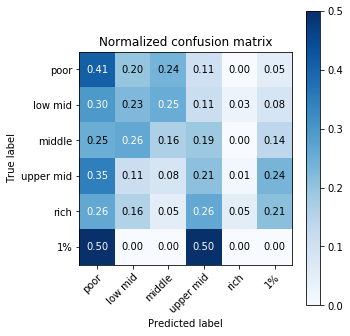

In [101]:

dt_clf.fit(X_sm_train, y_sm_train)
y_pred_class=dt_clf.predict(X_test)
y_sm_pred=dt_clf.predict(X_test)
cf = confusion_matrix(y_test, y_sm_pred)
np.set_printoptions(precision=2)

class_names=['poor','low mid','middle','upper mid','rich','1%']
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_sm_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_sm_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

Those 1% towns do not necessarily mean uber rich, just wealthy areas with low income diversity

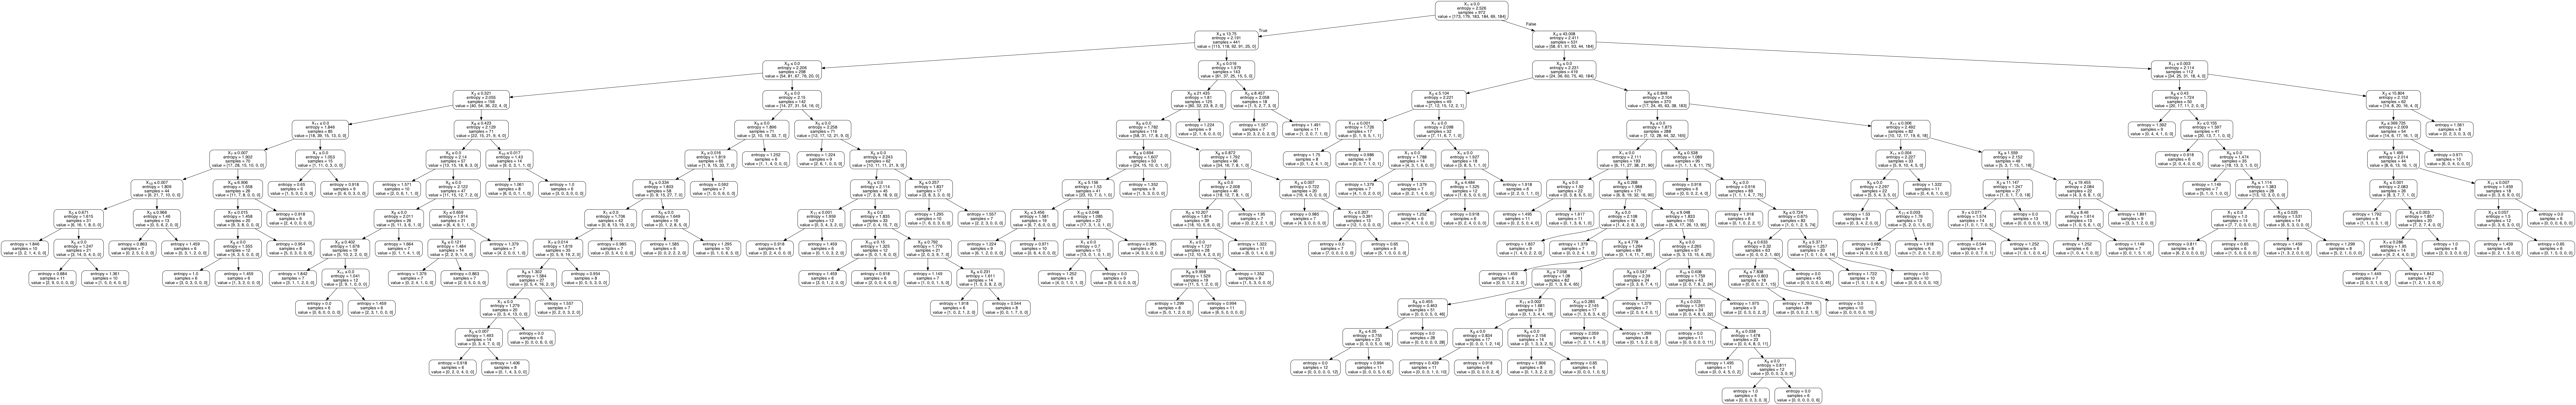

In [81]:

dt_clf.fit(X_sm_train, y_sm_train)
dot_data = StringIO()
export_graphviz(dt_clf, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

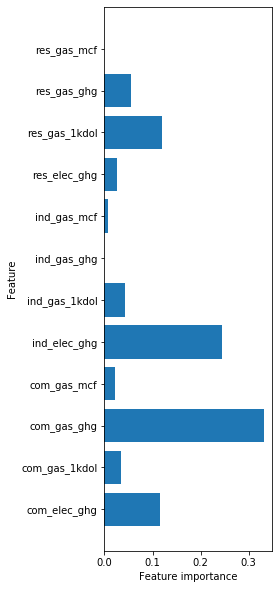

In [105]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.figure(figsize=(3,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
dt_clf.fit(X_sm_train,y_sm_train)
plot_feature_importances(dt_clf)